c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


--- Выполнение точечной привязки ---

--- Попытка связать: zebra.png | convolved_kernel | poisson ---
Успешно связано: zebra_convolved_kernel_poisson.png

Количество связанных изображений после точечной привязки: 1


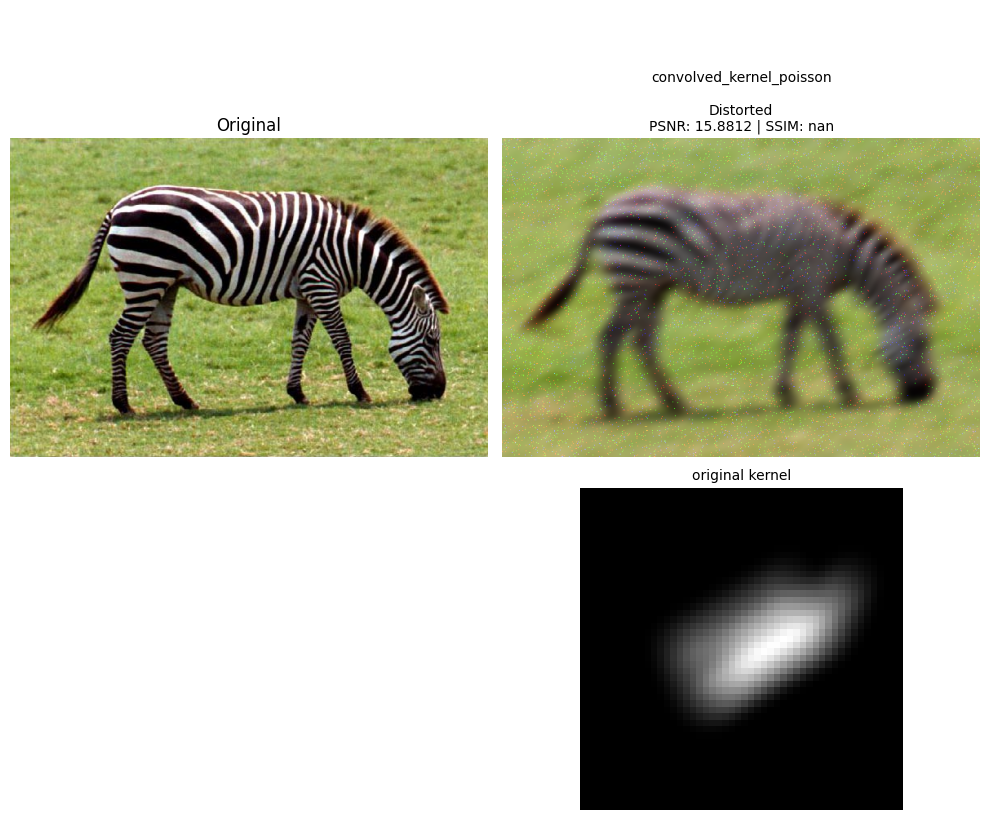


--- Выполнение полной автоматической привязки ---

=== Начало автоматического связывания датасета ===
Сканирование папки: images_dataset\distorted

--- Попытка связать: airplane.png | convolved_kernel | none ---
Успешно связано: airplane_convolved_kernel.png

--- Попытка связать: airplane.png | convolved_kernel | gaussian ---
Успешно связано: airplane_convolved_kernel_gaussian.png

--- Попытка связать: airplane.png | convolved_kernel | poisson ---
Успешно связано: airplane_convolved_kernel_poisson.png

--- Попытка связать: airplane.png | convolved_kernel | saltpepper ---
Успешно связано: airplane_convolved_kernel_saltpepper.png

--- Попытка связать: airplane.png | defocusdisk | none ---
Успешно связано: airplane_defocusdisk.png

--- Попытка связать: airplane.png | defocusdisk | gaussian ---
Успешно связано: airplane_defocusdisk_gaussian.png

--- Попытка связать: airplane.png | defocusdisk | poisson ---
Успешно связано: airplane_defocusdisk_poisson.png

--- Попытка связать: airplane.pn

In [1]:
# main.py или jupyter notebook

from processing import Processing
from bind_dataset import bind_single_entry, bind_full_dataset

# 1. Создаем экземпляр вашего фреймворка
# Убедитесь, что пути соответствуют вашей структуре
proc = Processing(
    images_folder='images_dataset/original',
    blurred_folder='images_dataset/distorted',
    kernel_dir='images_dataset/ground_truth_filters', # Эта папка здесь не используется, но нужна для инициализации
)

# --- Вариант 1: Точечная привязка нескольких файлов ---
print("--- Выполнение точечной привязки ---")


# Пример для файла с шумом
bind_single_entry(
    processing_instance=proc,
    original_image_name='zebra.png',
    blur_filter_name='convolved_kernel',
    noise_name='poisson' #чтобы задать отсутсвие шума нужно заменить на 'none'
)

# Теперь можно посмотреть, что привязалось
print(f"\nКоличество связанных изображений после точечной привязки: {len(proc.images)}")
proc.show()


# --- Вариант 2: Полная автоматическая загрузка всего датасета ---

# Сначала очистим то, что привязали вручную
proc.clear_input() 
print("\n--- Выполнение полной автоматической привязки ---")

bind_full_dataset(processing_instance=proc)

# И снова посмотрим, что получилось
print(f"\nКоличество связанных изображений после полной привязки: {len(proc.images)}")
#proc.show(size=0.5) # Уменьшим размер вывода, т.к. изображений может быть много

In [2]:
len(proc.images)

544

In [3]:
proc.save_bind_state(file_path='images_dataset/dataset_bind.json')